                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.952110   0.020336  0.899654  0.039774
1        Decision Tree  0.998352   0.388106  0.858131  0.534483
2        Random Forest  0.999359   0.662198  0.854671  0.746224


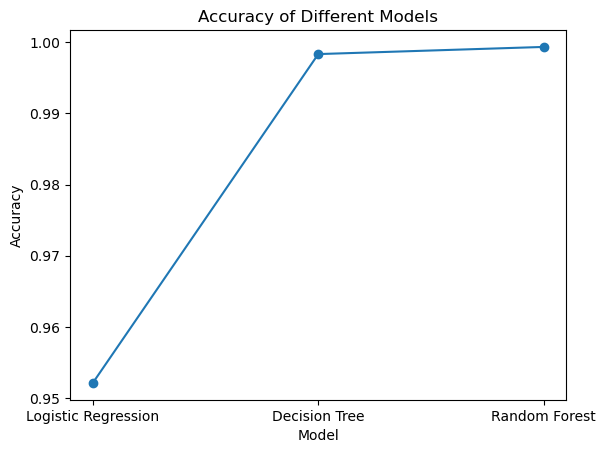

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# Import the matplotlib library
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("fraud_detection.csv")

# Create features and labels
features = df.drop("isFraud", axis=1)
labels = df["isFraud"]

# Enumerate the columns in the features DataFrame
for col in features.columns:

    # Check if the column is numeric
    if not pd.api.types.is_numeric_dtype(features[col]):

        # Create a label encoder for the column
        encoder = LabelEncoder()

        # Fit the encoder to the column data
        encoder.fit(features[col])

        # Transform the column data
        features[col] = encoder.transform(features[col])

        # Replace the string "PAYMENT" with the float value 0
        features.loc[features[col] == "PAYMENT", col] = 0

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

# Use SMOTE to oversample the fraud transactions in the training set
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

# Create the three models
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

# Train the three models
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Evaluate the three models on the test set
lr_pred = lr_model.predict(X_test)
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Calculate the accuracy, precision, recall, and F1 score of the three models
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Create a dictionary to store the results
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [lr_accuracy, dt_accuracy, rf_accuracy],
    "Precision": [lr_precision, dt_precision, rf_precision],
    "Recall": [lr_recall, dt_recall, rf_recall],
    "F1": [lr_f1, dt_f1, rf_f1],
}

# Create a Pandas DataFrame from the results dictionary
df = pd.DataFrame(results)

# Display the DataFrame
print(df.to_string())

# Plot the results
plt.plot(["Logistic Regression", "Decision Tree", "Random Forest"], [lr_accuracy, dt_accuracy, rf_accuracy], marker="o")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()